In [20]:
# import main packages you will need:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#other packackes will be imported on the go

## Read in data and look at it

In [2]:
df = pd.read_csv('pim_adr_lat_lon.csv', index_col=None)
df.head()

,Unnamed: 0,Worker,address_clean,latitude,longitude
0,0,Guri Husom Vonen,Sandefjordgata 4 0464 Oslo,59.940387,10.752922
1,1,Heidi Bjørnstad Hanstad,Linstows gate 4 0166 Oslo,59.919022,10.731203
2,2,Heidi Liljeblad Ødegård,Maridalsveien 64 0458 Oslo,59.936468,10.758604
3,3,Karoline Bonnerud,Lørenvangen 1 0585 Oslo,59.929115,10.795120
4,4,Kristin Hornæs,Bygdøy Allé 73 0268 Oslo,59.919248,10.695875


## Visualise data on a map

In [21]:
import folium

map = folium.Map(location=[59.9, 10.75], zoom_start=11)

for id in df.index:
    person = df.loc[id]
    position = [person.loc["latitude"], person.loc["longitude"]]
    folium.CircleMarker(
        position,
        popup=person.loc["Worker"],
        radius=5,
        fill=True
    ).add_to(map)

map.save("pim_map.html")
map

## Visualise data distributions

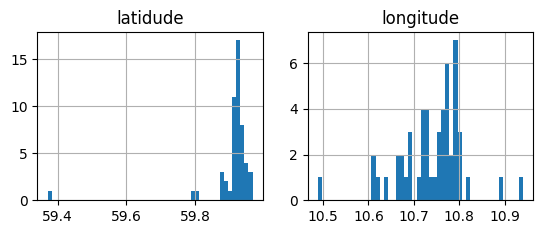

In [4]:
# plot with various axes scales:

plt.figure()
# latitude
plt.subplot(221)
plt.hist(df.latitude, 50)
#plt.yscale('log')
plt.title('latidude')
plt.grid(True)

# log
plt.subplot(222)
plt.hist(df.longitude, 50)
#plt.yscale('log')
plt.title('longitude')
plt.grid(True)

## Visualize data in a scatter plot:

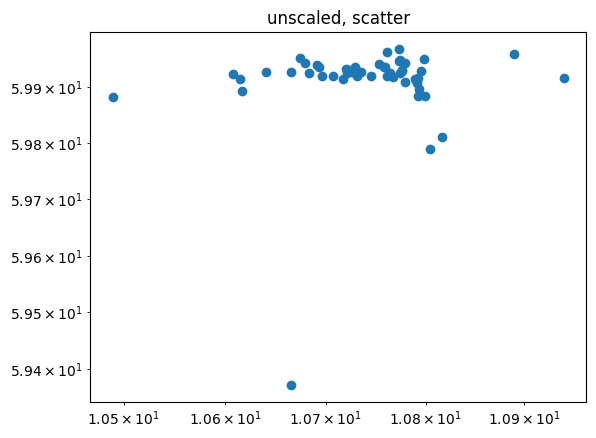

In [5]:
plt.figure()
plt.scatter(df.longitude,df.latitude)
plt.yscale('log')
plt.xscale('log')
plt.title('unscaled, scatter')
plt.grid(True)

## will it be better if we transformed the data?

Scale and normalize the data and visualize again with distributions and scatter plot. 

Comment.

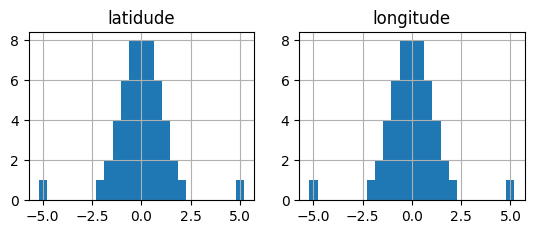

In [6]:
from sklearn.preprocessing import QuantileTransformer, quantile_transform

lat = df.latitude
lat = quantile_transform(
    df.latitude.to_frame(), n_quantiles=52, output_distribution="normal", copy=True
).squeeze()

lon = quantile_transform(
    df.longitude.to_frame(), n_quantiles=52, output_distribution="normal", copy=True
).squeeze()

plt.figure()
plt.subplot(221)
plt.hist(lat, 25)
plt.title('latidude')
plt.grid(True)
#
plt.subplot(222)
plt.hist(lon, 25)
plt.title('longitude')
plt.grid(True)


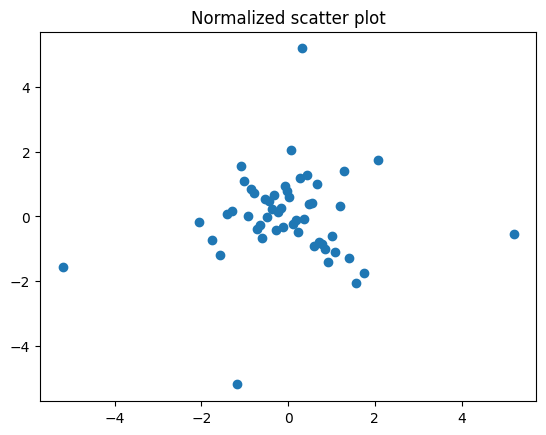

In [7]:
plt.figure()
plt.scatter(lon,lat)
plt.title("Normalized scatter plot")
plt.show()

## Now let's cluster the data.
Here's an example of the machine learning algorithm part,
kmeans with 3 clusters:

In [8]:

from sklearn.cluster import KMeans

#convert to 2D numpy array:
samples = np.vstack((lon, lat)).T
samples.shape
model = KMeans(n_clusters=3)
model.fit(samples)
labels = model.predict(samples)



## Plot clusters with color:
Here's an example of a scatter plot with colored clusters.

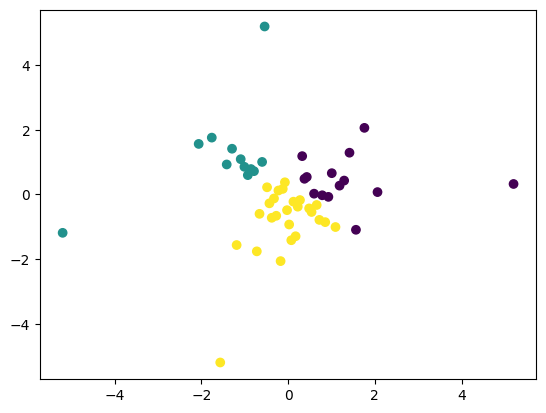

In [9]:
#scatterplot with color:
plt.scatter(lat,lon,c=labels)
plt.show()

## How many clusters should we have?
Calculate inertia to evaluate the cluster quality as function of number of clusters.
How many clusters is best to implement? Evaluate and comment.

In [10]:
inertia = []
for k in range(1,15):
    model_k = KMeans(n_clusters=k)
    model_k.fit(samples) 
    inertia.append(model_k.inertia_)




## Plot inertia as function of number of clusters

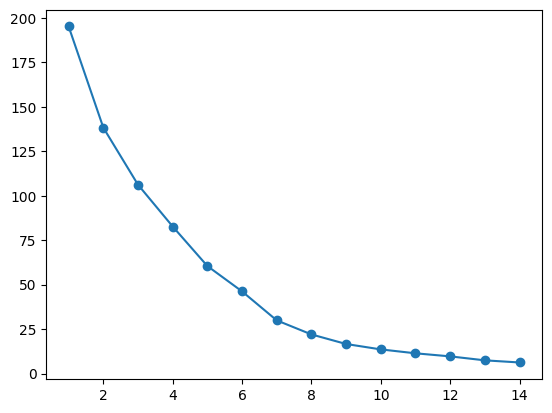

In [11]:
nr_clusters = list(range(1,15,1))
plt.figure()
plt.plot(nr_clusters,inertia,'-o')
plt.show()

## Choose appropriate cluster number and fit the model 

In [12]:
#choose model, assign clusters
n_clusters =10
model_final = KMeans(n_clusters=n_clusters)
model_final.fit(samples)
labels_final = model_final.predict(samples)

## Create scatter plot, colored by cluster

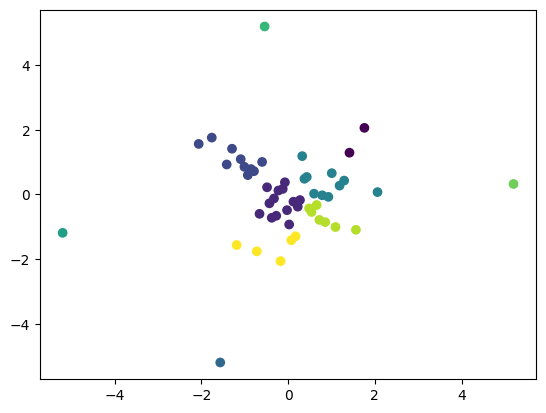

In [13]:
#scatterplot with color:
plt.scatter(lat,lon,c=labels_final)
plt.show()

## Plot the new clusters on a map, color by cluster

You will need to do some data wrangling of your choice now. 
Hint: use the code above for the folium map together with the colors array given below.

In [14]:
colors = [
    'red',
    'blue',
    'gray',
    'darkred',
    'lightred',
    'orange',
    'beige',
    'green',
    'darkgreen',
    'lightgreen',
    'darkblue',
    'lightblue',
    'purple',
    'darkpurple',
    'pink',
    'cadetblue',
    'lightgray',
    'black'
]


In [15]:
color_label = list(range(0,n_clusters,1))
colors = colors[0:len(color_label)]

d = {'label':color_label, 'color': colors} 
df_colors = pd.DataFrame(d)
df_colors.head()

,label,color
0,0,red
1,1,blue
2,2,gray
3,3,darkred
4,4,lightred


In [16]:
l = {'labels_final': labels_final} 
df_labels = pd.DataFrame(l)
df = pd.concat([df, df_labels], axis=1)
df.head()

,Unnamed: 0,Worker,address_clean,latitude,longitude,labels_final
0,0,Guri Husom Vonen,Sandefjordgata 4 0464 Oslo,59.940387,10.752922,4
1,1,Heidi Bjørnstad Hanstad,Linstows gate 4 0166 Oslo,59.919022,10.731203,1
2,2,Heidi Liljeblad Ødegård,Maridalsveien 64 0458 Oslo,59.936468,10.758604,4
3,3,Karoline Bonnerud,Lørenvangen 1 0585 Oslo,59.929115,10.795120,4
4,4,Kristin Hornæs,Bygdøy Allé 73 0268 Oslo,59.919248,10.695875,1


In [17]:
df = df.merge(df_colors, left_on="labels_final", right_on="label")
df.head()

,Unnamed: 0,Worker,address_clean,latitude,longitude,labels_final,label,color
0,0,Guri Husom Vonen,Sandefjordgata 4 0464 Oslo,59.940387,10.752922,4,4,lightred
1,2,Heidi Liljeblad Ødegård,Maridalsveien 64 0458 Oslo,59.936468,10.758604,4,4,lightred
2,3,Karoline Bonnerud,Lørenvangen 1 0585 Oslo,59.929115,10.795120,4,4,lightred
3,3,Andreas Bakke Moan,Jørgen Løvlands gate 3 570 Oslo,59.929245,10.775817,4,4,lightred
4,5,Anniken Holst,Maridalsveien 35 A 175 Oslo,59.936207,10.758928,4,4,lightred


In [18]:
#plot on map, color by cluster
map_clusters = folium.Map(location=[59.9, 10.75], zoom_start=11)

for id in df.index:
    #print(id)
    person = df.loc[id]
    position = [person.loc["latitude"], person.loc["longitude"]]
    color_label = person.loc["color"]
    folium.CircleMarker(
        position,
        popup=person.loc["Worker"],
        color = color_label,
        radius=5,
        fill=True
    ).add_to(map_clusters)

map_clusters.save("pim_map_with_clusters.html")

In [22]:
map_clusters

## If you want some extra work:

Compare the clusters with the manually set pim-cohorts. Discuss similarities/differences.
You will need to do the data prep yourself.
